In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Perceptrons

Perceptron was developed by Frank Rosenblatt, and it's one of the earliest kinds of *neural network*.

Much of the *neurons* model we'll encounter is *sigmoid neuron*.

### What's a perceptron?

A perceptron unit has multiple inputs $x_1, x_2, \ldots,$ and produces a single binary output. How is the binary output computed from the inputs? Each of the input is weighted by respective weights $w_1, w_2, \ldots,$, and the neuron's output (0 or 1) is determiend by comparing the weighted sum $\sum_j{w_j x_j}$ against a *threshold* $\theta$.

Expressed more concisely,


$$
\text{output}= 
\begin{cases}
    0, & \text{if } \sum_j{w_j x_j} \leq \theta\\
    1, & \text{if } \sum_j{w_j x_j} \gt \theta
\end{cases}
$$

The above expression can be further simplified by evaluating $\sum_j{w_j x_j} = w \cdot x$ and also reexpressing the inequality as that involving $w\cdot x - \theta = w\cdot x + b$ where $b = -\theta$.



$$
\text{output}= 
\begin{cases}
    0, & \text{if } w\cdot x + b \leq 0\\
    1, & \text{if } w\cdot x + b \gt 0
\end{cases}
$$

Here $b$ is the *bias* and can be thought of as the propensity for perceptron unit to fire.

### Example: NAND gates

A perceptron with two inputs $x_1$ and $x_2$ can be made to act as a *NAND* gate by setting both $w_1=w_2=-2$ and $b=3$.

With this, you can see that the output is $1$ (*true*), for $(x_1, x_2)$ values of $(0, 0)$, $(1, 0)$, and $(0, 1)$, but *not* for $(1, 1)$! This is precisely the behavior of a NAND logic gate.

The fact a perceptron unit can be turned into a NAND gate suggests that with enough such neuronal units, any logic circuit can be realized in perceptrons!

### Learning parameters

Althought the fact that perceptrons can perform everything a computer can do is a pretty cool finding in its own right, it still doesn't suggest exactly how we can build a network that achieves a desired computation. Ideally, we would like for the perceptrons to *learn*, by correctly adjusting the weights $w$ and bias $b$.

To make learning tractable, we would like it such that a *small change* in parameters (i.e. $w$ and $b$) leads to *small change* in the output.

Only problem is that perceptrons as we have it now, does *not* have such a property! In fact, a small changes in the weights $w$ or bias $b$ can cause the output of the perceptrons to flip from 0 to 1 in the second layer, which can subsequently lead to flips and flops throughout the network.

Such drastic changes resulting from a small changes in the parameter makes learning very problematic. However, this problem can be mitigated by employing a slightly different kind of neuron called *sigmoid* neuron. In particular, sigmoid neurons have the desired feature of small changes in parameters leading to small changes in the output. Let's see how that works out.

### Sigmoid neurons

Just like a perceptron, a sigmoid neuron has inputs $x_1, x_2, \ldots$. However, instead of only takeing a binary value of 0 or 1, the input (and as you'll see, the output) can take on any values between 0 and 1. Just like in the case of a perceptron, sigmoid neurons have weights $w_1, w_2, \ldots$ that multiply onto the inputs and a bias term $b$. However, the output is not binary value obtained by thresholding $w\cdot x + b$. Rather, the quantity $w\cdot x + b$ is run through the *sigmoid function* $\sigma(z)$ defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Putting it all togeter, the output of a sigmoid neuron with inputs $x_1, x_2, \ldots$ with weights $w_1, w_2, \ldots$ and bias $b$ is:

$$
\text{output} = \frac{1}{1 + \exp(-\sum_j{w_j x_j} - b)}
$$

To get a better idea of sigmoid function, let's plot it out!

(-0.1, 1.1)

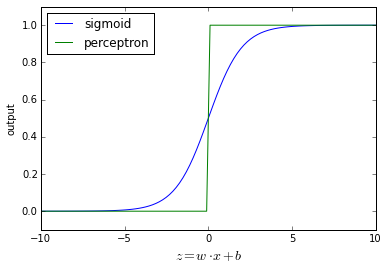

In [25]:
z = linspace(-10, 10, 100)
output = 1 / (1 + exp(-z))
perceptron = z > 0
plot(z, output, label='sigmoid')
plot(z, perceptron, label='perceptron')
legend(loc='best')
xlabel('$z = w \cdot x + b$', fontsize=14)
ylabel('output')
ylim(-0.1, 1.1)

In the plot above, the x-axis is the value of the sum of weighted input and the bias ($z = w \cdot x + b$). The expected output of the perceptron (green) highlights the *jumpy* nature of the perceptron response, with a sharp boundary at $z=0$.

Sigmoid neuron (blue), on the other hand, has a much more smooth and gradual transition between 0 and 1. From this it can be seen that sigmoid neuron is essentially a smoothened out version of the perceptron.

As you might have guessed by my mention of *small changes*, the smoothness in the sigmoid neuron's output renders the function *differentiable*. This means that with a small change in the weights $\Delta w$ and bias $\Delta b$, there is a small change in the output $\Delta y$ that can be approximated as:

$$
\Delta y \approx \sum_j\frac{\partial y}{\partial w_j}\Delta w_j + \frac{\partial y}{\partial b}\Delta b
$$

In other words, the smoothness (differentialibility) of the sigmoid function $\sigma(z)$ allows us to approximate the change in output, $\Delta y$ as (locally) linear functions of the changes in parameters, $\Delta w$ and $\Delta b$!

Before we move on, let's introduce some terminology in to the game. The sigmoid function $\sigma(z) = \sigma(w \cdot x + b)$ is *an example* of an *activation function* $f(\cdot)$. We can generalize both the perceptrons and sigmoid neurons as a network where the output $y = f(z) = f(w \cdot x + b)$ for some choice of activation function $f(\cdot)$. Obviously, choosing $f(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$ renders the neuron a *sigmoid neuron*. Alternatively, choosing $f(\cdot)$ to be a step function,

$$
f(z)= 
\begin{cases}
    0, & z \leq 0\\
    1, & z \gt 0
\end{cases}
$$

renders the neuron a *perceptron*!

### Choice of activation function $f(\cdot)$

In fact, as long as $f(\cdot)$ is smooth and differentiable, the locally linear relationship between changes in the parameters ($w$ and $b$) and the output ($y$) holds true. Then why use sigmoid function? This has a lot to do with the differentiated form of the sigmoid function.

\begin{align}
\frac{d\sigma(z)}{dz} &= \frac{d}{dz}\frac{1}{1 + e^-z} \\
&= \frac{e^{-z}}{(1+e^{-z})^2}
\end{align}

Now note that:

$$
1 - \sigma(z) = 1 - \frac{1}{1 + e^{-z}} = \frac{e^{-z}}{1 + e^{-z}}
$$

Hence, above derivative can be reexpressed as follows:

$$
\frac{d\sigma(z)}{dz} = \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} = \sigma(z) (1 - \sigma(z))
$$

We'll come back to this when we start using these derivatives of activation function to optimize the parameters for the network!

### Interpretation of output

A notable differnce of a sigmoid neuron from a perceptron is that the output is no longer binary, but rather takes on any value between 0 and 1. How shoudl we interpret it?

Interpretation of the output of such *continout* neuron unit really depends on context. If the output is supposed to be a pixel intensity, then the continous value can be mapped out to the grayscale on the pixel. However, if the output *is* supposed to be a binary (e.g. presence or absence of a face in the image), then we can appply thresholding on the output variable (e.g. at 0.5) to *convert* the output into a binary value.

## Exercises

#### Multiplication of $w$ and $b$ by a positive constant in perceptrons

Given a perceptron with weights $w$ and bias $b$, multiplying both of these by a positive constant $c$ does *not* alter the perceptron's behavior (output) in response to any input. This can easily be seen by comparing the behavior of the original perceptron against a perceptron with all weights and bias multiplied by $c$ such that $\hat{w} = cw$ and $\hat{b} = cb$. Given some arbitrary input $x$, the original perceptron's output $y$ is determined as in :

$$
y =
\begin{cases}
0, & \sum_j{w_j x_j} + b \leq 0 \\
1, & \sum_j{w_j x_j} + b \gt 0
\end{cases}
$$

Similarly, the output of the modified perceptron $\hat{y}$ to the same input can be determined as in:

$$
\hat{y} =
\begin{cases}
0, & \sum_j{c w_j x_j} + c b \leq 0 \\
1, & \sum_j{c w_j x_j} + c b \gt 0
\end{cases}
$$

which can be rewritten as:

$$
\hat{y} =
\begin{cases}
0, & c(\sum_j{w_j x_j} +  b) \leq 0 \\
1, & c(\sum_j{w_j x_j} +  b) \gt 0
\end{cases}
$$

But notice that, given $c > 0$,

$$
c\left(\sum_j{w_j x_j} + b\right) \leq 0 \iff \sum_j{w_j x_j} + b \leq 0
$$

and therefore,

$$
c\left(\sum_j{w_j x_j} + b\right) \gt 0 \iff \sum_j{w_j x_j} + b \gt 0
$$

Thus, the output of original and the modified perceptron will be the same for any input. provided that the input to the first layer remains the same, the all outputs of the modified perceptrons on the first layer don't change from scaliing with $c > 0$. Since the output of the first layer is the input to the second and it again is unchanged, it can be seen (by induction), that multiplying all parameters of a perceptron by a positive constant do *not* alter the network.

#### Multiplication of $w$ and $b$ by a positive constant in sigmoid neurons

Provided that all sigmoid neurons have non-zero $w \cdot x + b$ for a particular input $x$, the output of a sigmoid neuron is:

$$
y = \sigma(w \cdot x + b) = \frac{1}{1 + \exp(-w \cdot x - b)}
$$

Now, if we scale both $w$ and $b$ by a positive constant, $c > 0$,

$$
\hat{y} = \sigma(cw \cdot x + cb) = \frac{1}{1 + \exp(-c(w \cdot x + b))}
$$

As we increase the value of $c$: $c \to \infty$

$$
\begin{align}
\lim_{c \to \infty} \hat{y} &= \lim_{c \to \infty} \frac{1}{1 + \exp(c(w \cdot x + b))} \\
&=
\begin{cases}
0, & \text{if } w \cdot x + b \lt 0 \\
1, & \text{if } w \cdot x + b \gt 0
\end{cases}
\end{align}
$$

Hence, it can be seen that the output $\hat{y}$ approaches a step function based on the value of $w \cdot x + b$ and is exactly equal to a perceptron!

Now what if $wx + b = 0$? From above expressions, it can be seen that,

$$
\hat{y} = \sigma(c \cdot 0) = \frac{1}{2}
$$

and it does not depend on the value of $c$ at all. Hence, if some of the sigmoid neurons equals to $0$ for a value of $x$, that perceptron will always yield 0.5 regardless of the value of scaling factor $c$ and thus does *not* approach the behavior of a perceptron which should be 0 in this case.

###  Architecture of neural networks

When drawing and describing neural networks, it is helpful to know certain terminologies to describe parts of the network.

In drawing neural network, the network is typically arranged in such way that information flows from *left to right*. Therefore, the left end corresponds to the input into the network, whereas the right end corresponds to the output of the network. Under this configuration, the left most layer of neurons are referred to as *input neurons*. Correspondingly, the right most layer of neurons are the *output neurons*.
The middle layers (those that are nither input nor output) are called *hidden layer*.

Confusingly, such multilayer neural networks may be referred to as multilayer perceptrons (MLP) despite the fact that the network is not composed of perceptrons but rather with sigmoid neurons. This reference exists for largely historical reasons, and it is best avoided (although should be aware of it).

All networks that will be covered in this book are *feedforward* networks - information only flows forward and never backward. Graphically speaking, this means there cannot be any loops in the network graph.

There exists a class of neural networks where such loops are allowed and these are known as *recurrent neural networks*. In such networks, the trick is to separate the activation of units in time, such that there is a delay between an input layer firing and the subsequent layer collecting and responding to the inputs.

## Handwritten digit classification - simple network

Now that we got the basic network lingos covered, it's time to *build* a network that does something useful, and we'll start by tacking the famous handwritten digit classification problem.

The problem can be divided into two parts. First is the *image segmentation*, where an image of multiple digits (e.g. 8432) needs to be split into smaller images each containing only one digit (e.g. 8, 4, 3, and 2).

The second is, of course, the *classification* of the digits into one of the ten possible categories.

#### Exercise

To solve the problem of turning on the binary digit in response to the readout, we have to consider when does each digit need to be turned on. To see this, let's write out the 4-bit binary representation of the numbers 0-9:

* 0: 0000
* 1: 0001
* 2: 0010
* 3: 0011
* 4: 0100
* 5: 0101
* 6: 0110
* 7: 0111
* 8: 1000
* 9: 1001

Now let's reorganize when each bit is turned on.

* bit 1 (least significant bit): 1, 3, 5, 7, and 9
* bit 2: 2, 3, 6, and 7
* bit 3: 4, 5, 6, and 7
* bit 4 (most significant bit): 8 and 9

The weight for each unit should look something like this:

* bit 1: w = k [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
* bit 2: w = k [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
* bit 3: w = k [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
* bit 4: w = k [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

with b = -0.5*k

Where k is some positive constant.

Alternatively, we could use matrix computation to get the result.

We could solve for transfer matrix X and bias b, which give rise to 
aX + b = c. 

a is an 1 by 10 array given by activity from the old output layer. c is an 1 by 4 array representing activity of the new output layer.


Therefore, if we need all the 0 - 9 values being correctly transfered to the binary output thorugh X and b, they will need to satisify AX + b =C. 

A is an 10 by 10 matrix indicating activity from the old output layer with 0 - 9 as the correct digits. Given the definition of the network, it's easy to see that A is an 10 by 10 identity matrix, i.e. I.

C is the response of the new output layer with 0 - 9 as the correct digits.

In [25]:
import numpy as np

c = np.matrix('0 0 0 0;0 0 0 1;0 0 1 0;0 0 1 1;0 1 0 0;0 1 0 1;0 1 1 0;0 1 1 1;1 0 0 0;1 0 0 1')
print ('C =')
print (c)

C =
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]]


Given that IX+b = X+b = C, X = C - b

## Learning with gradient descent

We'll quantify how well our neural network model is able to classify images of digits using a cost function:

$$
C(w, b) = \frac{1}{2n} \sum_x \lVert y(x) - a\rVert 
$$

Where, $w$ is the collection of *all* weights for our neurons, and $b$ is the collection of *all* bias terms. $n$ is the total number of training inputs, and $a$ is the vector of outputs when $x$ is the input. $y(x)$ is the function that our network is trying to apprximate.

The cost function $C$ above will be referred to as the *quadratic* cost function. It's also commonly referred to as the *mean squared error* or *MSE*.

Looking at the cost function $C$, it's obvious that $C \geq 0$ for all $x$, and that $C \to 0$ only as $a \to y(x)$ for all $x$.

Given this, the goal of *training* of our network is to minimize the above cost function, as a function of weights $w$ and biases $b$. To achieve this, we are going to use optimization algorightm known as *gradient descent*. 

#### Why quadratic cost function?

You may be wondering why aren't we simply counting the number of images incorrectly classified rather than looking at a surrogate measure of the quadratic cost function. The problem with using the number of misses is that it's not a smooth function of the parameters $w$ and $b$. Using the number of misses, there will be many values of $w$ and $b$ for which small changes in $w$ and/or $b$ do *not* result in any difference in the cost, making it difficult for an algorithm to know how to modify the parameters to improve the performance (decrease the cost).

If instead we use a smooth cost function such as the quadratic cost function, any small changes in the parameters will give rise to a small but noticeable difference in the cost, allowing for the algorithm to infer how to modify the parameter to improve the performance of the network.

#### Optimizing a 2D function

Let's consider the case of minimizing a generic scalar output function first. We'll denote this function as $C(v)$ where $v=v_1, v_2, \ldots$. We'll start by considering the case of 2D input: $v = (v_1, v_2)^T$

With such a function, it might be tempting to try to solve the problem analytically - by finding values of parameters for which partial derivative $\frac{\partial C}{\partial v_i} = 0$. Although this may work for a simple function, such method doesn't scale well with increasing number of input variables.

What do we do then? Turns out we can use our intuition about a ball rolling down hill to arrive at a method of fidning a minimum! We will randomly choose a starting point $(v_1^{(0)}, v_2^{(0)})^T$, and will *simulate* the motion of a hypothetical ball positioned there.

In essense, we want to move the ball such that it moves downward - that is to a position with a lower value of $C(v)$. To achieve this, let's use Calculus local linear approximation to the function:

$$
\Delta C \approx  \frac{\partial C}{\partial v_1}\Delta v_1 + \frac{\partial C}{\partial v_2}\Delta v_2
$$

where $\frac{\partial C}{\partial v_1}$ and $\frac{\partial C}{\partial v_2}$ are evaluated at the current location $(v_1^{(0)}, v_2^{(0)})^T$.

The notation can be simplified by vectorizing everything. Namely,

$$
\Delta v = (\Delta v_1, \Delta v_2)^T
$$

and

$$
\nabla C = \left(\frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2}\right)^T
$$

where $\nabla C$ is of course the *gradient* of $C$ evaluated at current location.

Therefore, the above expression can be rewritten as:

$$
\Delta C \approx \nabla C \cdot \Delta v
$$

If we wish to point $\Delta v$ in the right direction so as to attain smallest (most negative) value of $\Delta C$, then we should choose:

$$
\Delta v = -\eta \nabla C
$$

where $\eta$ is some small, positive parameter (known as the *learning rate*).

With this choice of $\Delta v$, we can see that

$$
\Delta C \approx -\eta \nabla C \cdot \nabla C = -\eta \lVert \nabla C \rVert ^2,
$$

guaranteeing $\Delta C$ to be negative.

Given this *small* movement of the ball $\Delta v$ that can decreases the value of $C$, we can compute the ball's next position as:

$$
v^{(i+1)} = v^{(i)} + \Delta v = v^{(i)} - \eta \nabla C
$$

and this is called an *update rule* for $v$.

Note that in order for the above update function to work and keep yielding a new position for which $C(v^{i+1)}) \leq C(v^{i})$, the learning rate $\eta$ must be small enough to make the local linear approximation a good one. However, we also don't want to pick too small of a value of $\eta$ as that could redner the learning algorithm very slow!

The above *derivation* of gradient descent update rule can be easiy extneded to the case of a function with more than two variables. Suppose $C$ is a function of $m$ variables, $v_1, v_2, \ldots, v_m$. The change in $C$, $\Delta C$, for a *small change* $\Delta v = (\Delta v_1, \Delta v_2, \ldots, \Delta v_m)^T$ is:

$$
\Delta C = \nabla C \cdot \Delta v
$$

just as before, where

$$
\nabla C = \left( \frac{\partial C}{\partial v_1}, \ldots, \frac{\partial C}{\partial v_m} \right)^T
$$

We can then choose

$$
\Delta v = -\eta \nabla C
$$

and guarantee that (for small $\eta$), $\Delta C$ will be negative.

Hence, again, we can *update* the location as

$$
v^{(i+1)} = v^{(i)} + \Delta v = v^{(i)} - \eta \nabla C
$$

#### Exercises

We want to show that the choice of $\Delta v$ is in a sense the optimal choice.

Based on Cauchy-Schwartz inequality
$$
\lvert \nabla C \cdot \Delta v \rvert \leq \lVert \nabla C \rVert \lVert \Delta v \rVert
$$

Hence the smallest possible value of $ \Delta C \approx \nabla C \cdot \Delta v$ is $-\lVert \nabla C \rVert \lVert \Delta v \rVert$, and this occurs when $\Delta v \propto -\nabla C$.

Since $\lVert \Delta v \rVert = \epsilon$, we can choose $v = -\eta \nabla C$ where $\eta = \frac{\epsilon}{\lVert \nabla C \rVert}$

When the function $C$ is a function of a single variable, then the method of gradient descent can be thought of as going down the slope on a 2D valley.

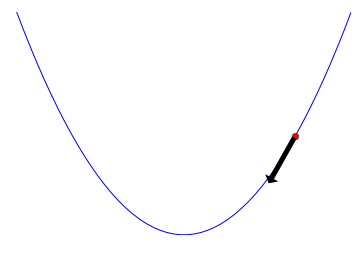

In [48]:
x = linspace(-3, 3)
plot(x, x**2)
axis('off')
annotate('', xy=(1.5, 2), xytext=(2, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plot(2, 4, 'ro')

### Gradient descent applied to neural network

Armed with an understanding of gradient descent method, let's see how this can be used to optimize our cosft function $C(w, b)$ with respect to the weights $w$ and biases $b$.

Basically, our "location" in the search space will be defined by the combined vector $(w_1, \ldots, w_k,\ldots, b_1, \ldots, b_l, \ldots)^T$, with a corresponding $\nabla C$ with components $\frac{\partial C}{\partial w_k}$ and $\frac{\partial C}{\partial b_l}$.

The update rule for each component of weights and biases will be:

$$
w_k^{(i+1)} = w_k^{(i)} - \eta \frac{\partial C}{\partial w_k}
$$

and 

$$
b_l^{(i+1)} = b_l^{(i)} - \eta \frac{\partial C}{\partial b_l}
$$

#### Stochastic gradient descent

Although the above update rules will allows us to look for a minimum in the const function $C$, the evaluation of the gradient of $C$ may be costly. To see this, recall that

\begin{align}
C(w, b) &= \frac{1}{n}\sum_x{C_x} \\
&= \frac{1}{n}\sum_x{\frac{\lVert y(x) - a \rVert^2}{2}}
\end{align}

Note that the evaluation of the above cost function requires the evaluation of $C_x$ for each of the $n$ samples ($x$). Hence the computational load for evaluating $C$ as well as $\nabla C$ scales linearly with the number of training samples $n$.

Unfortunately, this can be hindering as the number of samples increases because each cycle of update step may take a really long time! (You also have to consider the fact that the shape of the cost function *can* get more complex with more samples (as you are effectively mixing more functions!)

How can we deal with this? One potential method is to *approximate* the $C(w, b)$ by *sampling* $m$ sample training points out of $n$ .

$$
\frac{1}{m}\sum_{j=1}^{m}{\nabla C_{x_j}} \approx \frac{1}{n}\sum_x {\nabla C_x} = \nabla C
$$

The above approximation tends to be better the more samples $m$ we use out of total of $n$ training data: that is it gets better as $m \to n$.

Hence, to speed up our learning process when we have large number of training points (i.e. large $n$). This means that we can use this approximation in the update step, such that:

The update rule for each component of weights and biases will be:

$$
w_k^{(i+1)} = w_k^{(i)} - \frac{\eta}{m} \sum_{j=1}^{m} \frac{\partial C_{x_j}}{\partial w_k}
$$

and 

$$
b_l^{(i+1)} = b_l^{(i)} - \frac{\eta}{m} \sum_{j=1}^{m} \frac{\partial C_{x_j}}{\partial b_l}
$$

Now it would be rather wasteful to use only $m$ out of $n$ samples you have. Can you make good use of the remaining $n-m$ samples? 

The trick here to use a *different set of $m$ samples* on each run of the above update algorithm, and you draw the set of $m$ samples from the remaining samples randomly. Hence, you complete the update on *mini-batches* of $m$ samples at a time, and repeat until you exhaust all $n$ samples, which is said to have *completed an epoch*. Once you complete an epoch (exhausted $n$ samples), you start over, repeating the process until training update converges.

The above described algorithm for *approximating* a full gradient descent procedure is known as *stochastic* gradient descent with mini-batch size of $m$. 

#### Learning rate $\eta$

When performing gradient descent with $n$ samples, notice that the term $\eta$ is natually scaled by a factor $\frac{1}{n}$ as shown below:

$$
w_k^{(i+1)} = w_k^{(i)} - \eta \frac{\partial C}{\partial w_k} = w_k^{(i)} - \frac{\eta}{n} \sum_{j=i}^n {\frac{\partial C_{x_j}}{\partial w_k}}
$$

and 

$$
b_l^{(i+1)} = b_l^{(i)} - \eta \frac{\partial C}{\partial b_l} =  b_l^{(i)} - \frac{\eta}{n} \sum_{j=1}^n{\frac{\partial C_{x_j}}{\partial b_l}}
$$


The scaling by number of samples $\frac{1}{n}$ is sometimes ommited, thus simply summing over invidual sample gradients rather than averaging. This is useful when the number of training samples is not known in advance (e.g. samples are getting generated dynamically).

Stochastic gradient descent is compared to a political poll - *sampling*!

#### Exercise

An extreme version of stochastic gradient descent is to use mini-batch size of 1 ($m=1$)! That means, we update the parameters $w$ and $b$ by computing the gradient on one sample at a time. This procedure is known as *online* or *incremental* learning, and is often compared to *one-shot learning* in human beings.

One big advantage of this is the fact that the learning can take place *dynamically* as more samples are made available - when a new sample arise, we can simply update the parameter! Also of course the speed of computation is a benefit. You cannot get much simpler than computing just one gradient!

However, using $m=1$ can cause the gradient to deviate largely from what the gradient would be for all samples together. This means that now there is more chance that an anomaly sample to (negatively) affect the learning compared to using larger mini-batch size. For example, if a training sample is *mislabeled*, it can have a strong effect on the network parameters, much more so than if it was just a sample out of $m$ samples in the mini-batch.

### Visualizing high dimensional space

The author has a very good but all too often understated point in the dicussuion of working with high dimensional data. As the author points out, no one can *visualize* data in 4 dimensions or beyond (if you include color, perhaps 4D is actually *visualizable* but such method doesn't work for any higher dimension). The trick is to *extrapolate* intuition from lower dimension variants of the data. It is also common to see how something changes when transitioning from using 2D data to 3D data set, and to use this as the basis for imagining what happens in 4D and beyond.

## Summary

I'm going to conclude Part 1 of the Chatper 1 at this point, as we have visited all concepts needed to now actually implement a neural network and train it on real data sets. In the next part, I'll cover the rest of the Chapter 1 where we actually tackle the problem of *implementing* and *training* a neural network to perform hand-written digit calssification, using everything we learned thus far!